Proposed Question:
You are a data scientist and would like to know where the top 5 places in the world (country or city) where your salary (in USD) will go the farthest with respect to each individual index within the cost_of_living.csv.  Provide a simple statistical analysis in a Jupyter Notebook file and provide visualizations to support your analysis.

Alternative ways to ask the proposed question:
(Prior to using Chat GPT):
* What are the top countries/cities in the world where your salary as a data scientist will be worth the most when compared to the indices in the 'cost_of_living.csv'?
* Where is a data scientist's salary worth the most?
* Where is the ratio of salary to cost of living the highest?  OR Where is the ratio of cost of living to salary the lowest?
* What cities within the top 5 countries would be the best to be employed for your salary as a data scientist go the farthest?
* How do other factors (i.e., percent remote, experience level) impact how far your salry will go in the top locations with respect to each individual index within the 'cost_of_living.csv'?

(From Chat GPT - some edits made to the adjust wording)
* Which are the top 5 countries or cities where a salary in USD has the highest purchasing power based on the cost of living indices in the 'cost_of_living.csv'?
* How does the purchasing power of a salary compare across the 5 countries/cities with the lowest cost of living indices for each index in the 'cost_of_living.csv'?
* What are the top 5 countries or cities where a salary in USD will go the farthest with respect to EACH index in 'cost_of_living.csv'?
* For a range of salaries, which are the top 5 countries or cities where the salary will go the farthest, according to each index in 'cost_of_living.csv'?
* Which are the top 5 countries or cities in each continent where a salary in USD has the highest purchasing power based on the cost of living indices in the 'cost_of_living.csv'?

(There were a couple other questions produced by ChatGPT relating to data that was not available here but could be interesting - particiularly, looking at variations overtime and seasonally to see if time impacted where a salary would go the farthest.)

In [1]:
# import libraries to be used during the project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import data files to be used during the project
infile1="C:\\Users\\Amanda\\Documents\\R and Python Programming\\Python Project\\cost_of_living.csv"

infile2="C:\\Users\\Amanda\\Documents\\R and Python Programming\\Python Project\\ds_salaries.csv"

infile3="C:\\Users\\Amanda\\Documents\\R and Python Programming\\Python Project\\Levels_Fyi_Salary_Data.csv"

infile4="C:\\Users\\Amanda\\Documents\\R and Python Programming\\Python Project\\country_codes.csv"


cost_of_living=pd.read_csv(infile1)

salaries=pd.read_csv(infile2)

levels=pd.read_csv(infile3)

country_codes=pd.read_csv(infile4)

I started with data exploration using .head() and dtypes for each dataframe.  After this exploration, I decided to first focus on wrangling the data in the cost_of_living dataframe.  I moved the exploration of the other three dataframes so I could reexamine them when I needed to use them for my analysis

In [3]:
print(cost_of_living.head())
cost_of_living.dtypes
print(cost_of_living.shape)

   Rank                 City  Cost of Living Index  Rent Index  \
0   NaN    Hamilton, Bermuda                149.02       96.10   
1   NaN  Zurich, Switzerland                131.24       69.26   
2   NaN   Basel, Switzerland                130.93       49.38   
3   NaN     Zug, Switzerland                128.13       72.12   
4   NaN  Lugano, Switzerland                123.99       44.99   

   Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
0                          124.22           157.89                  155.22   
1                          102.19           136.14                  132.52   
2                           92.70           137.07                  130.95   
3                          101.87           132.61                  130.93   
4                           86.96           129.17                  119.80   

   Local Purchasing Power Index  
0                         79.43  
1                        129.79  
2                        111.53 

To start, I would like to examine the mean and median salaries in each country and then compare to each column in the cost of living dataframe.  My goal is to create a dataframe with the country, average index value, index type, mean salary, and median salary.  I would like to use this dataframe to create scatterplots comparing index values to salary.

In [4]:
# to ensure that I do not manipulate the original dataframes, I am going to create and manipulate a new dataframe
cost_index = cost_of_living


# When looking at the cost_of_living dataframe, I noticed that the values I saw in the 'Rank' column were all NaN.
# I checked and found out that all the values in this column are NaN.
cost_index[cost_index['Rank'].notna()]

cost_index.head()

,Rank,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,NaN,"Hamilton, Bermuda",149.02,96.10,124.22,157.89,155.22,79.43
1,NaN,"Zurich, Switzerland",131.24,69.26,102.19,136.14,132.52,129.79
2,NaN,"Basel, Switzerland",130.93,49.38,92.70,137.07,130.95,111.53
3,NaN,"Zug, Switzerland",128.13,72.12,101.87,132.61,130.93,143.40
4,NaN,"Lugano, Switzerland",123.99,44.99,86.96,129.17,119.80,111.96


In [5]:
cost_index.describe()
# for each index, the mean and median appear to be relatively close, meaning that either could be appropriate to use during my analysis
# the greatest difference between the mean and median is about 5 - the mean of cost of living index and restaurant index are almost 5 units less than the median

,Rank,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
count,0.0,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000
mean,NaN,57.541349,26.650657,43.061228,53.566782,54.354360,71.504481
std,NaN,21.656441,17.841544,18.903751,22.125102,25.863557,34.206184
min,NaN,18.550000,2.370000,10.970000,15.220000,11.390000,1.620000
25%,NaN,38.015000,12.265000,26.145000,34.025000,30.447500,42.762500
50%,NaN,62.405000,23.280000,44.990000,52.735000,59.135000,70.935000
75%,NaN,73.030000,36.615000,55.720000,68.942500,73.545000,95.682500
max,NaN,149.020000,108.420000,124.220000,157.890000,155.220000,172.980000


When I initially split the City column into city and country, I received a ValueError.  I figured out that some of the values included city, state, country (if they are located in the US).  To solve this error, I split the strings once by setting n = 1.  I first tried using str.split, but then if there was a state or provence, it became part of the country column.  By using str.rsplit, I was able to split at the first comma from the right to ensure that the country was the only part of the location included in the country column. 

In [6]:
# split city column into city and country
# use rsplit to split from the right instead of the left so that US cities are in the form city, state
cost_index[['city', 'country']] = cost_index['City'].str.rsplit(', ', n = 1, expand = True)

print(cost_index.head(20))


    Rank                              City  Cost of Living Index  Rent Index  \
0    NaN                 Hamilton, Bermuda                149.02       96.10   
1    NaN               Zurich, Switzerland                131.24       69.26   
2    NaN                Basel, Switzerland                130.93       49.38   
3    NaN                  Zug, Switzerland                128.13       72.12   
4    NaN               Lugano, Switzerland                123.99       44.99   
5    NaN             Lausanne, Switzerland                122.03       59.55   
6    NaN                   Beirut, Lebanon                120.47       27.76   
7    NaN                 Bern, Switzerland                118.16       46.12   
8    NaN               Geneva, Switzerland                114.05       75.05   
9    NaN                 Stavanger, Norway                104.61       35.38   
10   NaN       Honolulu, HI, United States                103.65       65.07   
11   NaN                      Oslo, Norw

In [7]:
# remove 'City' column and move 'city' and 'country' to beginning of dataframe
cost_index = cost_index.drop('City', axis = 1)
cost_index = cost_index.loc[:, ['city', 'country', 'Cost of Living Index', 'Rent Index', 'Cost of Living Plus Rent Index', 'Groceries Index', 'Restaurant Price Index', 'Local Purchasing Power Index']]
print(cost_index.head(20))

                 city        country  Cost of Living Index  Rent Index  \
0            Hamilton        Bermuda                149.02       96.10   
1              Zurich    Switzerland                131.24       69.26   
2               Basel    Switzerland                130.93       49.38   
3                 Zug    Switzerland                128.13       72.12   
4              Lugano    Switzerland                123.99       44.99   
5            Lausanne    Switzerland                122.03       59.55   
6              Beirut        Lebanon                120.47       27.76   
7                Bern    Switzerland                118.16       46.12   
8              Geneva    Switzerland                114.05       75.05   
9           Stavanger         Norway                104.61       35.38   
10       Honolulu, HI  United States                103.65       65.07   
11               Oslo         Norway                102.33       46.39   
12             Bergen         Norway  

I now want to unpivot the cost_index dataframe from wide to long, creating two columns to summarize the index values.  One column will indicate that Index Type and the other will indicate the Index Value.

In [8]:
cost_index = cost_index.melt(id_vars = ['city', 'country'],
                                       value_vars = ['Cost of Living Index', 'Rent Index', 'Cost of Living Plus Rent Index', 'Groceries Index', 'Restaurant Price Index', 'Local Purchasing Power Index'], 
                                       var_name = 'index_type', value_name = 'index_value')
print(cost_index.head())

       city      country            index_type  index_value
0  Hamilton      Bermuda  Cost of Living Index       149.02
1    Zurich  Switzerland  Cost of Living Index       131.24
2     Basel  Switzerland  Cost of Living Index       130.93
3       Zug  Switzerland  Cost of Living Index       128.13
4    Lugano  Switzerland  Cost of Living Index       123.99


I want to determine the shape of the index_values for each index_type to decide whether to use the mean or median to represent the values for each country. I will create box plots for each index_type to examine the shape of the data.

<Axes: xlabel='index_value', ylabel='index_type'>

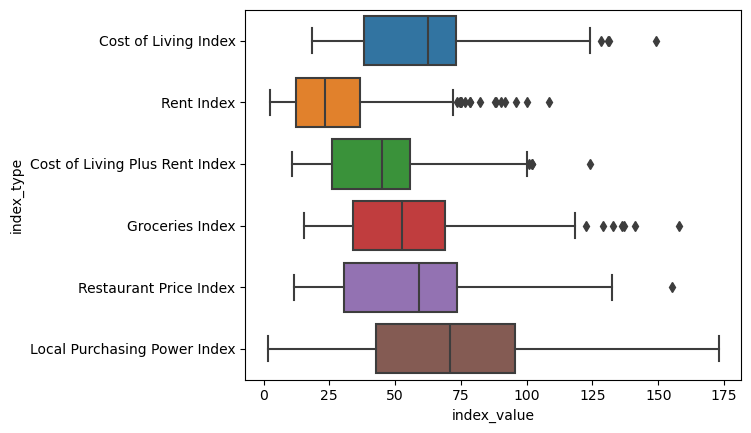

In [9]:
sns.boxplot(x = 'index_value', y = 'index_type', data = cost_index)

All the boxplots are skewed (at least slightly) to the right, indicating the median will be a better representation of the index_value than the mean. Additionally, all the box plots show that there are high outliers, with the exception of the Local Purchasing Power Index.

I will aggregate the data to find the median value for each country for each index_value.

In [10]:
median_cost_index = cost_index.groupby(['country', 'index_type'])['index_value'].median()

#set index as a column
median_cost_index = median_cost_index.reset_index()

# rename index_value as median_index_value
median_cost_index = median_cost_index.rename(columns = {'index_value': 'median_index_value'})

print(median_cost_index.head(15))

        country                      index_type  median_index_value
0   Afghanistan            Cost of Living Index               21.35
1   Afghanistan  Cost of Living Plus Rent Index               12.83
2   Afghanistan                 Groceries Index               15.22
3   Afghanistan    Local Purchasing Power Index               22.79
4   Afghanistan                      Rent Index                3.17
5   Afghanistan          Restaurant Price Index               14.85
6       Albania            Cost of Living Index               38.68
7       Albania  Cost of Living Plus Rent Index               25.86
8       Albania                 Groceries Index               30.99
9       Albania    Local Purchasing Power Index               31.15
10      Albania                      Rent Index               11.33
11      Albania          Restaurant Price Index               29.86
12      Algeria            Cost of Living Index               29.84
13      Algeria  Cost of Living Plus Rent Index 

In [11]:
# reexamine salaries dataframe
print(salaries.head())
salaries.dtypes

   Unnamed: 0  work_year experience_level employment_type  \
0           0       2020               MI              FT   
1           1       2020               SE              FT   
2           2       2020               SE              FT   
3           3       2020               MI              FT   
4           4       2020               SE              FT   

                    job_title  salary salary_currency  salary_in_usd  \
0              Data Scientist   70000             EUR          79833   
1  Machine Learning Scientist  260000             USD         260000   
2           Big Data Engineer   85000             GBP         109024   
3        Product Data Analyst   20000             USD          20000   
4   Machine Learning Engineer  150000             USD         150000   

  employee_residence  remote_ratio company_location company_size  
0                 DE             0               DE            L  
1                 JP             0               JP            S  

Unnamed: 0             int64
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

To begin, I will create a dataframe called salary_by_country from the salaries dataframe using only the variables I am interested in.

In [12]:
salary_by_country = pd.DataFrame({'experience_level':salaries['experience_level'], 'employment_type':salaries['employment_type'], 'salary_in_usd':salaries['salary_in_usd'], 'remote_ratio':salaries['remote_ratio'], 'company_location':salaries['company_location']})
print(salary_by_country.head())

  experience_level employment_type  salary_in_usd  remote_ratio  \
0               MI              FT          79833             0   
1               SE              FT         260000             0   
2               SE              FT         109024            50   
3               MI              FT          20000             0   
4               SE              FT         150000            50   

  company_location  
0               DE  
1               JP  
2               GB  
3               HN  
4               US  


I am only concerend about full time jobs so I will want to subset the dataframe so that only these rows are included.  Once subsetted, I will remove the 'employment_type' column.

In [13]:
salary_by_country = salary_by_country[salary_by_country['employment_type'] == 'FT']
salary_by_country = salary_by_country.drop('employment_type', axis =1)
print(salary_by_country[0:20])

   experience_level  salary_in_usd  remote_ratio company_location
0                MI          79833             0               DE
1                SE         260000             0               JP
2                SE         109024            50               GB
3                MI          20000             0               HN
4                SE         150000            50               US
5                EN          72000           100               US
6                SE         190000           100               US
7                MI          35735            50               HU
8                MI         135000           100               US
9                SE         125000            50               NZ
10               EN          51321             0               FR
11               MI          40481             0               IN
12               EN          39916             0               FR
13               MI          87000           100               US
14        

Next, I will look at the country_codes dataframe so that I can create a column for company_location with the name of the country instead of the country code.

In [14]:
print(country_codes.head())
country_codes.dtypes

          Country Alpha-2 code Alpha-3 code  Numeric
0     Afghanistan           AF          AFG        4
1         Albania           AL          ALB        8
2         Algeria           DZ          DZA       12
3  American Samoa           AS          ASM       16
4         Andorra           AD          AND       20


Country         object
Alpha-2 code    object
Alpha-3 code    object
Numeric          int64
dtype: object

In [15]:
salary_by_country = salary_by_country.merge(country_codes, how = 'left', left_on = 'company_location', right_on = 'Alpha-2 code')
print(salary_by_country.head())

  experience_level  salary_in_usd  remote_ratio company_location  \
0               MI          79833             0               DE   
1               SE         260000             0               JP   
2               SE         109024            50               GB   
3               MI          20000             0               HN   
4               SE         150000            50               US   

                                             Country Alpha-2 code  \
0                                            Germany           DE   
1                                              Japan           JP   
2  United Kingdom of Great Britain and Northern I...           GB   
3                                           Honduras           HN   
4                     United States of America (the)           US   

  Alpha-3 code  Numeric  
0          DEU      276  
1          JPN      392  
2          GBR      826  
3          HND      340  
4          USA      840  


In [16]:
# drop columns from country_codes dataframe other than the Country
salary_by_country =salary_by_country.drop(columns = ['Alpha-2 code', 'Alpha-3 code', 'Numeric'])
print(salary_by_country.head())

  experience_level  salary_in_usd  remote_ratio company_location  \
0               MI          79833             0               DE   
1               SE         260000             0               JP   
2               SE         109024            50               GB   
3               MI          20000             0               HN   
4               SE         150000            50               US   

                                             Country  
0                                            Germany  
1                                              Japan  
2  United Kingdom of Great Britain and Northern I...  
3                                           Honduras  
4                     United States of America (the)  


In [17]:
# check for missing values in the salary_by_country dataframe before removing company_location column
salary_by_country.isnull().values.any()

# remove company_location column and rename Country column country
salary_by_country = salary_by_country.drop(columns = ['company_location'])
salary_by_country = salary_by_country.rename(columns = {'Country': 'country'})

Eventually, I may like to explore the salaries grouped by experience_level and remote_ratio in the top countries where salary will go the farthest with respect to cost of living.  However, first I need to determine the top countries.  To do this, I will need to find the median salary in each country.

In [18]:
# create dataframe with country and salary
median_salary_by_country = pd.DataFrame({'country':salary_by_country['country'], 'salary':salary_by_country['salary_in_usd']})
print(median_salary_by_country.head())

                                             country  salary
0                                            Germany   79833
1                                              Japan  260000
2  United Kingdom of Great Britain and Northern I...  109024
3                                           Honduras   20000
4                     United States of America (the)  150000


In [19]:
# aggregate data to find median salary by country
median_salary_by_country = median_salary_by_country.groupby('country')['salary'].median()

#set index as a column
median_salary_by_country = median_salary_by_country.reset_index()

# rename index_value as median_index_value
median_salary_by_country = median_salary_by_country.rename(columns = {'salary': 'median_salary'})

print(median_salary_by_country.head())

          country  median_salary
0  American Samoa        18053.0
1       Australia        87425.0
2         Austria        69489.5
3         Belgium        85699.0
4          Brazil        18907.0


I want to merge this dataframe with the median_index_vs_salary dataframe but I am unsure if the country names are the same in both dataframes.  For example, I noticed that in the salary_by_country dataframe names the US as 'United States of America (the)' and median_index_vs_salary names the US as 'United States'.  If I do an outer join, I may be able to examine where missing data is to address this issue.

In [20]:
median_index_vs_salary = median_cost_index.merge(median_salary_by_country, how = 'outer', on = 'country')
print(median_index_vs_salary.head(20))

        country                      index_type  median_index_value  \
0   Afghanistan            Cost of Living Index               21.35   
1   Afghanistan  Cost of Living Plus Rent Index               12.83   
2   Afghanistan                 Groceries Index               15.22   
3   Afghanistan    Local Purchasing Power Index               22.79   
4   Afghanistan                      Rent Index                3.17   
5   Afghanistan          Restaurant Price Index               14.85   
6       Albania            Cost of Living Index               38.68   
7       Albania  Cost of Living Plus Rent Index               25.86   
8       Albania                 Groceries Index               30.99   
9       Albania    Local Purchasing Power Index               31.15   
10      Albania                      Rent Index               11.33   
11      Albania          Restaurant Price Index               29.86   
12      Algeria            Cost of Living Index               29.84   
13    

It appears that there are A LOT of missing values.  I could do an inner join, but feel like I will lose a lot of data that way.  Also, it seems as though some countries are named differently (as I mentioned earlier).  I want to try to find where this is true so I can rename the countries in one of the original dataframes and then try merging again.
Before I go farther with this, I will look at how many data values are missing in the 'salary' and 'median_index_value'.

In [21]:
median_index_vs_salary['median_salary'].isnull().sum()

534

In [22]:
median_index_vs_salary['median_index_value'].isnull().sum()

11

In [23]:
len(median_index_vs_salary)

773

Out of 773 rows, 534 are missing values in the 'median_salary' column and 11 are missing values in the 'median_index_values' column.  I want to go back to the original dataframe and compare the 'country' values in each of them.

In [24]:
countries_cost_index = median_cost_index['country'].unique().tolist()
print(countries_cost_index)
len(countries_cost_index)

['Afghanistan', 'Albania', 'Algeria', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Bermuda', 'Bolivia', 'Bosnia And Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Cambodia', 'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Ivory Coast', 'Jamaica', 'Japan', 'Jersey', 'Jordan', 'Kazakhstan', 'Kenya', 'Kosovo (Disputed Territory)', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lebanon', 'Lithuania', 'Luxembourg', 'Macao', 'Malaysia', 'Maldives', 'Malta', 'Mexico', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco', 'Nepal', 'Netherlands', 'New Zealand', 'Nigeria', 'North Macedonia', 'Norway', 'Oman', 'P

127

In [25]:
countries_salary = median_salary_by_country['country'].unique().tolist()
print(countries_salary)
len(countries_salary)

['American Samoa', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Chile', 'China', 'Colombia', 'Croatia', 'Czechia', 'Denmark', 'Estonia', 'France', 'Germany', 'Greece', 'Honduras', 'Hungary', 'India', 'Iran (Islamic Republic of)', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kenya', 'Luxembourg', 'Malaysia', 'Malta', 'Mexico', 'Moldova (the Republic of)', 'Netherlands (the)', 'New Zealand', 'Nigeria', 'Pakistan', 'Poland', 'Portugal', 'Romania', 'Russian Federation (the)', 'Singapore', 'Slovenia', 'Spain', 'Switzerland', 'Turkey', 'Ukraine', 'United Arab Emirates (the)', 'United Kingdom of Great Britain and Northern Ireland (the)', 'United States of America (the)', 'Viet Nam']


49

I want all the uncommon elements between these two lists. I will do this using list comprehension and set intersection.
After initially doing this, I sorted the list of 100 to more easily identify the countries that are names differently.

In [26]:
uncommon_countries = [country for country in countries_cost_index if country not in countries_salary] + [country for country in countries_salary if country not in countries_cost_index]
uncommon_countries.sort()
print(uncommon_countries)
len(uncommon_countries)

['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Argentina', 'Armenia', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Belarus', 'Bermuda', 'Bolivia', 'Bosnia And Herzegovina', 'Botswana', 'Bulgaria', 'Cambodia', 'Costa Rica', 'Cuba', 'Cyprus', 'Czech Republic', 'Czechia', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Ethiopia', 'Fiji', 'Finland', 'Georgia', 'Ghana', 'Guatemala', 'Honduras', 'Hong Kong', 'Iceland', 'Indonesia', 'Iran', 'Iran (Islamic Republic of)', 'Ivory Coast', 'Jamaica', 'Jersey', 'Jordan', 'Kazakhstan', 'Kosovo (Disputed Territory)', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lebanon', 'Lithuania', 'Macao', 'Maldives', 'Moldova', 'Moldova (the Republic of)', 'Mongolia', 'Montenegro', 'Morocco', 'Nepal', 'Netherlands', 'Netherlands (the)', 'North Macedonia', 'Norway', 'Oman', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Puerto Rico', 'Qatar', 'Russia', 'Russian Federation (the)', 'Rwanda', 'Saudi Arabia', 'Senegal', 'Serbia', 'Slovakia', 'South Afri

100

countries that only appear in one of the lists:
Afghanistan, Albania, Algeria, American Samoa, Argentina, Armenia, Azerbaijan, Bahamas, Bahrain, Bangladesh, Belarus, Bermuda, Bolivia, Bosnia and Herzegovina, Botswana, Bulgaria, Cambodia, Costa Rica, Cuba, Cyprus, Dominican Republic, Ecuador, Egypt, El Salvador, Ethiopia, Fiji, Finland, Georgia, Ghana, Guatemala, Hondoras, Hong Kong, Iceland, Indonesia, Ivory Coast, Jamaica, Jersey, Jordan, Kazakhstan, Kosovo (Disrupted Territory), Kuwait, Kyrgyzstan, Latvia, Lebanon, Lithuania, Macao, Maldives, Mongolia, Montenegro, Morocco, Nepal, North Macedonia, Norway, Oman, Panama, Paraguay, Peru, Philippines, Puerto Rico, Qatar, Rwanda, Saudi Arabia, Senegal, Serbia, Slovakia, South Africa, South Korea, Sri Lanka, Suriname, Sweden, Syria, Taiwan, Tanzania, Thailand, Trinidad And Tobago, Tunisia, Uganda, Uruguay, Uzbekistan, Venezuela, Zambia, Zimbabwe

countries that are the same but listed under different names:
Czech Republic - Czechia
Iran - Iran (Islamic Republic of)
Moldova - Moldova (the Republic of)
Netherlands - Netherlands (the)
Russia - Russian Federation (the)
United Arab Emirates - United Arab Emirates (the)
United Kingdom - United Kingdom of Great Britain and Northern Ireland (the)
United States - United States of America (the)
Vietnam - Viet Nam

The names on the left are from the median_cost_index dataframe while the names on the right are from the median_salary_by_country.  To (hopefully!) get a dataframe without missing values while maintaining as much of the data as possible, I will rename the countries in the median_salary_by_country then perform an inner join.  Having examined the data, many of the countries only appearing on one of the lists are only on the cost_of_living dataframe meaning we do not have salary data for these countries from the salaries dataframe.

In [27]:
replace_country_names = {
    'Czechia':'Czech Republic',
    'Iran (Islamic Republic of)':'Iran',
    'Moldova (the Republic of)':'Moldova',
    'Netherlands (the)':'Netherlands',
    'Russian Federation (the)':'Russia',
    'United Arab Emirates (the)':'United Arab Emirates',
    'United Kingdom of Great Britain and Northern Ireland (the)':'United Kingdom',
    'United States of America (the)':'United States',
    'Viet Nam':'Vietnam'
}
median_salary_by_country = median_salary_by_country.replace(replace_country_names)
print(median_salary_by_country)

                 country  median_salary
0         American Samoa        18053.0
1              Australia        87425.0
2                Austria        69489.5
3                Belgium        85699.0
4                 Brazil        18907.0
5                 Canada        81895.5
6                  Chile        40038.0
7                  China        71665.5
8               Colombia        21844.0
9                Croatia        45618.0
10        Czech Republic        69999.0
11               Denmark        67275.0
12               Estonia        32974.0
13                France        56738.0
14               Germany        79515.0
15                Greece        49461.0
16              Honduras        20000.0
17               Hungary        35735.0
18                 India        22611.0
19                  Iran         4000.0
20                  Iraq       100000.0
21               Ireland        71444.0
22                Israel       119059.0
23                 Italy        51064.0


In [28]:
median_index_vs_salary = median_cost_index.merge(median_salary_by_country, how = 'inner', on = 'country')
print(median_index_vs_salary.head(20))

      country                      index_type  median_index_value  \
0   Australia            Cost of Living Index              76.675   
1   Australia  Cost of Living Plus Rent Index              58.945   
2   Australia                 Groceries Index              77.295   
3   Australia    Local Purchasing Power Index             104.380   
4   Australia                      Rent Index              37.595   
5   Australia          Restaurant Price Index              74.150   
6     Austria            Cost of Living Index              73.550   
7     Austria  Cost of Living Plus Rent Index              52.540   
8     Austria                 Groceries Index              66.990   
9     Austria    Local Purchasing Power Index              78.350   
10    Austria                      Rent Index              30.140   
11    Austria          Restaurant Price Index              68.460   
12    Belgium            Cost of Living Index              72.860   
13    Belgium  Cost of Living Plus

In [29]:
# check for missing values
median_index_vs_salary.isnull().values.any()

False

In [30]:
print(median_index_vs_salary.columns)

Index(['country', 'index_type', 'median_index_value', 'median_salary'], dtype='object')


Now that I have my desired dataframe, I can compare the median salary and index for each index_type to determine the top countries where data science salary will go the farthest.  To compare, I want to look at regression plots for each index_type.  I anticipate that there will be a positive correlation - as median salary increases the index value will likely go up.  The top countries will have a high median salary and low index value.

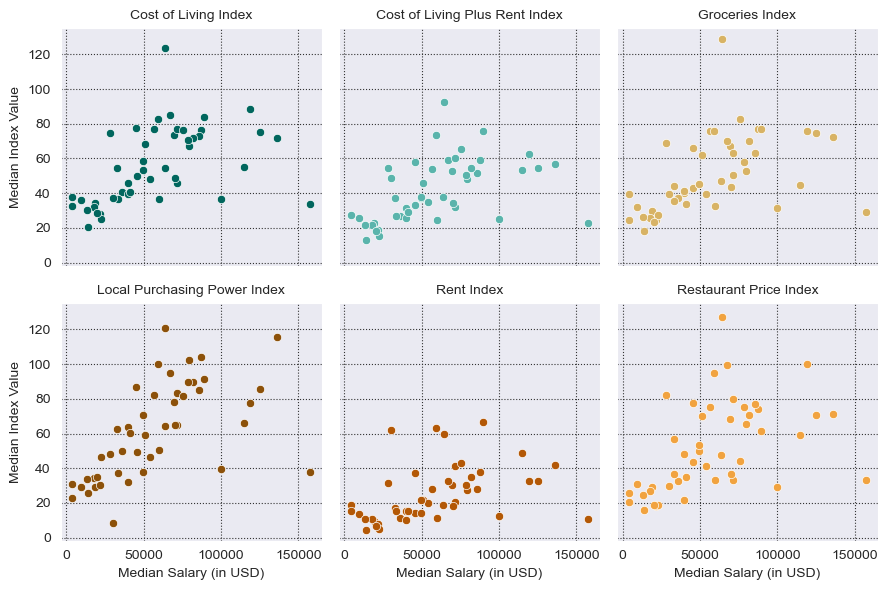

In [31]:
# set own colors
my_palette = ["#01665e", "#5ab4ac", "#d8b365", "#8c510a", "#b35806", "#f1a340", "#998ec3", "#542788", "#fee0b6", "#f6e8c3", "#c7eae5"]
# set my custom color palette as the default
custom_Palette = sns.set_palette(sns.color_palette(my_palette))

# adjust background and grid color/style
sns.set_style("darkgrid", {"grid.color": ".2", "grid.linestyle": ":"})

# create faceted scatterplots
g = sns.FacetGrid(median_index_vs_salary, col = 'index_type', col_wrap = 3, hue = 'index_type', palette = custom_Palette)
g =g.map(sns.scatterplot, "median_salary", "median_index_value")

# Add title and labels
g.set_axis_labels("Median Salary (in USD)", "Median Index Value")
g.set_titles(col_template = "{col_name}")

sns.despine(right = False, top = False)

In [32]:
sns.color_palette(my_palette)

[(0.00392156862745098, 0.4, 0.3686274509803922),
 (0.35294117647058826, 0.7058823529411765, 0.6745098039215687),
 (0.8470588235294118, 0.7019607843137254, 0.396078431372549),
 (0.5490196078431373, 0.3176470588235294, 0.0392156862745098),
 (0.7019607843137254, 0.34509803921568627, 0.023529411764705882),
 (0.9450980392156862, 0.6392156862745098, 0.25098039215686274),
 (0.6, 0.5568627450980392, 0.7647058823529411),
 (0.32941176470588235, 0.15294117647058825, 0.5333333333333333),
 (0.996078431372549, 0.8784313725490196, 0.7137254901960784),
 (0.9647058823529412, 0.9098039215686274, 0.7647058823529411),
 (0.7803921568627451, 0.9176470588235294, 0.8980392156862745)]

Upon examination, there are 5-6 countries with median salaries at or above $100,000.  Because 100 is the index value that represents the national average for the country it represents, anything below 100 represents a cost of living index below the national average.  To see where the salary will go the farthest with respect to each index, I will subset the median_index_vs_salary dataframe to find out where the median salary is at least 100,000 dollars and the index value is less than 100 for each of the index types. 

In [33]:
top_cost_of_living_index = median_index_vs_salary[(median_index_vs_salary['index_type'] == 'Cost of Living Index') & (median_index_vs_salary['median_index_value'] < 100) & (median_index_vs_salary['median_salary'] >= 100000)]
print(top_cost_of_living_index)

                  country            index_type  median_index_value  \
108                  Iraq  Cost of Living Index              36.420   
120                Israel  Cost of Living Index              88.770   
180           New Zealand  Cost of Living Index              75.240   
216                Russia  Cost of Living Index              33.560   
258  United Arab Emirates  Cost of Living Index              55.235   
270         United States  Cost of Living Index              71.560   

     median_salary  
108       100000.0  
120       119059.0  
180       125000.0  
216       157500.0  
258       115000.0  
270       136300.0  


In [34]:
top_rent_index = median_index_vs_salary[(median_index_vs_salary['index_type'] == 'Rent Index') & (median_index_vs_salary['median_index_value'] < 100) & (median_index_vs_salary['median_salary'] >= 100000)]
print(top_rent_index)

                  country  index_type  median_index_value  median_salary
112                  Iraq  Rent Index              12.450       100000.0
124                Israel  Rent Index              32.680       119059.0
184           New Zealand  Rent Index              32.580       125000.0
220                Russia  Rent Index              10.445       157500.0
262  United Arab Emirates  Rent Index              49.045       115000.0
274         United States  Rent Index              41.680       136300.0


In [35]:
top_cost_of_living_plus_rent_index = median_index_vs_salary[(median_index_vs_salary['index_type'] == 'Cost of Living Plus Rent Index') & (median_index_vs_salary['median_index_value'] < 100) & (median_index_vs_salary['median_salary'] >= 100000)]
print(top_cost_of_living_plus_rent_index)

                  country                      index_type  median_index_value  \
109                  Iraq  Cost of Living Plus Rent Index              25.185   
121                Israel  Cost of Living Plus Rent Index              62.520   
181           New Zealand  Cost of Living Plus Rent Index              54.510   
217                Russia  Cost of Living Plus Rent Index              22.710   
259  United Arab Emirates  Cost of Living Plus Rent Index              53.095   
271         United States  Cost of Living Plus Rent Index              56.870   

     median_salary  
109       100000.0  
121       119059.0  
181       125000.0  
217       157500.0  
259       115000.0  
271       136300.0  


In [36]:
top_groceries_index = median_index_vs_salary[(median_index_vs_salary['index_type'] == 'Groceries Index') & (median_index_vs_salary['median_index_value'] < 100) & (median_index_vs_salary['median_salary'] >= 100000)]
print(top_groceries_index)

                  country       index_type  median_index_value  median_salary
110                  Iraq  Groceries Index              31.510       100000.0
122                Israel  Groceries Index              76.040       119059.0
182           New Zealand  Groceries Index              74.450       125000.0
218                Russia  Groceries Index              29.100       157500.0
260  United Arab Emirates  Groceries Index              44.625       115000.0
272         United States  Groceries Index              72.400       136300.0


In [37]:
top_restaurant_price_index = median_index_vs_salary[(median_index_vs_salary['index_type'] == 'Restaurant Price Index') & (median_index_vs_salary['median_index_value'] < 100) & (median_index_vs_salary['median_salary'] >= 100000)]
print(top_restaurant_price_index)

                  country              index_type  median_index_value  \
113                  Iraq  Restaurant Price Index              29.430   
185           New Zealand  Restaurant Price Index              70.900   
221                Russia  Restaurant Price Index              33.255   
263  United Arab Emirates  Restaurant Price Index              59.030   
275         United States  Restaurant Price Index              71.120   

     median_salary  
113       100000.0  
185       125000.0  
221       157500.0  
263       115000.0  
275       136300.0  


In [38]:
top_local_purchasing_power_index = median_index_vs_salary[(median_index_vs_salary['index_type'] == 'Local Purchasing Power Index') & (median_index_vs_salary['median_index_value'] < 100) & (median_index_vs_salary['median_salary'] >= 100000)]
print(top_local_purchasing_power_index)

                  country                    index_type  median_index_value  \
111                  Iraq  Local Purchasing Power Index              39.455   
123                Israel  Local Purchasing Power Index              77.610   
183           New Zealand  Local Purchasing Power Index              85.490   
219                Russia  Local Purchasing Power Index              37.645   
261  United Arab Emirates  Local Purchasing Power Index              65.965   

     median_salary  
111       100000.0  
123       119059.0  
183       125000.0  
219       157500.0  
261       115000.0  


In [39]:
top_countries_by_conditions = median_index_vs_salary[median_index_vs_salary['country'].isin(['Iraq', 'Israel', 'New Zealand', 'Russia', 'United Arab Emirates', 'United States'])]

# pivot from long to wide
top_countries_by_conditions = top_countries_by_conditions.pivot(index = ['country', 'median_salary'], columns = 'index_type', values = 'median_index_value' )
top_countries_by_conditions = top_countries_by_conditions.reset_index()
print(top_countries_by_conditions)

top_countries_by_conditions.style.format_index(str.upper, axis = 1)

index_type               country  median_salary  Cost of Living Index  \
0                           Iraq       100000.0                36.420   
1                         Israel       119059.0                88.770   
2                    New Zealand       125000.0                75.240   
3                         Russia       157500.0                33.560   
4           United Arab Emirates       115000.0                55.235   
5                  United States       136300.0                71.560   

index_type  Cost of Living Plus Rent Index  Groceries Index  \
0                                   25.185           31.510   
1                                   62.520           76.040   
2                                   54.510           74.450   
3                                   22.710           29.100   
4                                   53.095           44.625   
5                                   56.870           72.400   

index_type  Local Purchasing Power Index  Rent

index_type,COUNTRY,MEDIAN_SALARY,COST OF LIVING INDEX,COST OF LIVING PLUS RENT INDEX,GROCERIES INDEX,LOCAL PURCHASING POWER INDEX,RENT INDEX,RESTAURANT PRICE INDEX
0,Iraq,100000.000000,36.420000,25.185000,31.510000,39.455000,12.450000,29.430000
1,Israel,119059.000000,88.770000,62.520000,76.040000,77.610000,32.680000,100.370000
2,New Zealand,125000.000000,75.240000,54.510000,74.450000,85.490000,32.580000,70.900000
3,Russia,157500.000000,33.560000,22.710000,29.100000,37.645000,10.445000,33.255000
4,United Arab Emirates,115000.000000,55.235000,53.095000,44.625000,65.965000,49.045000,59.030000
5,United States,136300.000000,71.560000,56.870000,72.400000,115.610000,41.680000,71.120000


I wonder in which country the salary can go the farthest based on the ratio of median_salary to median_index_value.  This would be a better comparison point as the larger the ratio, the farther a dollar would go based on the index value.  While the countries that met the conditions I provided are likely to have larger ratios, I am curious if any other countries will surface based on this value. I will add a column with this ratio to the median_index_vs_salary dataframe and examine which countries are the top 5 for each index type.

In [40]:
median_index_vs_salary['salary_to_index_value_ratio'] = median_index_vs_salary['median_salary']/median_index_vs_salary['median_index_value']

# round values in dataframe to the nearest hundredth
median_index_vs_salary = median_index_vs_salary.round(2)
print(median_index_vs_salary.head())

     country                      index_type  median_index_value  \
0  Australia            Cost of Living Index               76.68   
1  Australia  Cost of Living Plus Rent Index               58.94   
2  Australia                 Groceries Index               77.30   
3  Australia    Local Purchasing Power Index              104.38   
4  Australia                      Rent Index               37.60   

   median_salary  salary_to_index_value_ratio  
0        87425.0                      1140.20  
1        87425.0                      1483.16  
2        87425.0                      1131.06  
3        87425.0                       837.56  
4        87425.0                      2325.44  


In [41]:
top_ratio_cost_of_living_index = median_index_vs_salary[median_index_vs_salary['index_type'] == 'Cost of Living Index']
top_ratio_cost_of_living_index = top_ratio_cost_of_living_index.nlargest(5, 'salary_to_index_value_ratio')
print(top_ratio_cost_of_living_index)

                  country            index_type  median_index_value  \
216                Russia  Cost of Living Index               33.56   
108                  Iraq  Cost of Living Index               36.42   
258  United Arab Emirates  Cost of Living Index               55.24   
270         United States  Cost of Living Index               71.56   
180           New Zealand  Cost of Living Index               75.24   

     median_salary  salary_to_index_value_ratio  
216       157500.0                      4693.09  
108       100000.0                      2745.74  
258       115000.0                      2082.01  
270       136300.0                      1904.70  
180       125000.0                      1661.35  


In [42]:
top_ratio_rent_index = median_index_vs_salary[median_index_vs_salary['index_type'] == 'Rent Index']
top_ratio_rent_index = top_ratio_rent_index.nlargest(5, 'salary_to_index_value_ratio')
print(top_ratio_rent_index)

      country  index_type  median_index_value  median_salary  \
220    Russia  Rent Index               10.44       157500.0   
112      Iraq  Rent Index               12.45       100000.0   
214   Romania  Rent Index               11.13        60000.0   
100     India  Rent Index                5.01        22611.0   
154  Malaysia  Rent Index                9.87        40000.0   

     salary_to_index_value_ratio  
220                     15078.99  
112                      8032.13  
214                      5390.84  
100                      4513.17  
154                      4052.68  


Text(0, 0.5, 'Median Salary to Median Index Value Ratio')

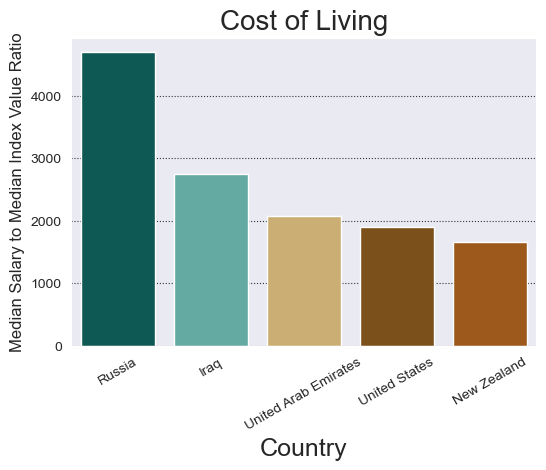

In [43]:
plt.figure(figsize = (6, 4))
sns.barplot(x = 'country',
            y = 'salary_to_index_value_ratio',
            data = top_ratio_cost_of_living_index)
plt.title('Cost of Living', fontsize = 20)
plt.xticks(rotation = 30)
sns.set_style("darkgrid")
plt.xlabel('Country', fontsize = 18)
plt.ylabel('Median Salary to Median Index Value Ratio', fontsize = 12)

Text(0, 0.5, 'Median Salary to Median Index Value Ratio')

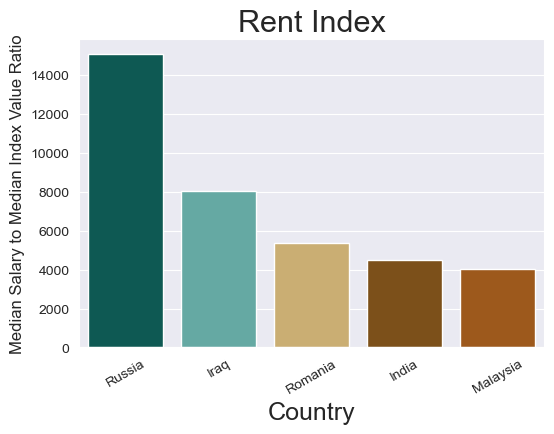

In [44]:
plt.figure(figsize = (6, 4))
sns.barplot(x = 'country',
            y = 'salary_to_index_value_ratio',
            data = top_ratio_rent_index)
plt.title('Rent Index', fontsize = 22)
plt.xticks(rotation = 30)
sns.set_style("darkgrid")
plt.xlabel('Country', fontsize = 18)
plt.ylabel('Median Salary to Median Index Value Ratio', fontsize = 12)

In [45]:
top_ratio_cost_of_living_plus_rent_index = median_index_vs_salary[median_index_vs_salary['index_type'] == 'Cost of Living Plus Rent Index']
top_ratio_cost_of_living_plus_rent_index = top_ratio_cost_of_living_plus_rent_index.nlargest(5, 'salary_to_index_value_ratio')
print(top_ratio_cost_of_living_plus_rent_index)

           country                      index_type  median_index_value  \
217         Russia  Cost of Living Plus Rent Index               22.71   
109           Iraq  Cost of Living Plus Rent Index               25.18   
211        Romania  Cost of Living Plus Rent Index               24.68   
271  United States  Cost of Living Plus Rent Index               56.87   
181    New Zealand  Cost of Living Plus Rent Index               54.51   

     median_salary  salary_to_index_value_ratio  
217       157500.0                      6935.27  
109       100000.0                      3970.62  
211        60000.0                      2430.63  
271       136300.0                      2396.69  
181       125000.0                      2293.16  


Text(0, 0.5, 'Median Salary to Median Index Value Ratio')

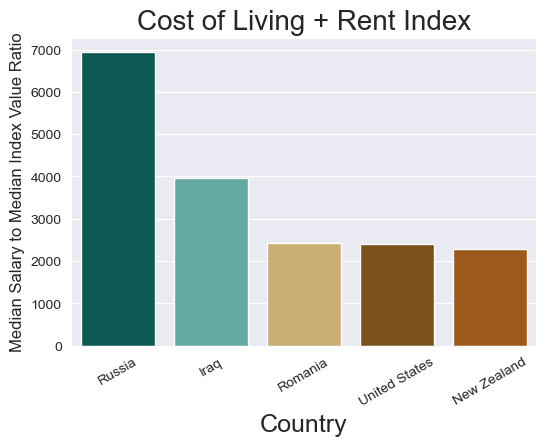

In [46]:
plt.figure(figsize = (6, 4))
sns.barplot(x = 'country',
            y = 'salary_to_index_value_ratio',
            data = top_ratio_cost_of_living_plus_rent_index)
plt.title('Cost of Living + Rent Index', fontsize = 20)
plt.xticks(rotation = 30)
sns.set_style("darkgrid")
plt.xlabel('Country', fontsize = 18)
plt.ylabel('Median Salary to Median Index Value Ratio', fontsize = 12)

In [47]:
top_ratio_groceries_index = median_index_vs_salary[median_index_vs_salary['index_type'] == 'Groceries Index']
top_ratio_groceries_index = top_ratio_groceries_index.nlargest(5, 'salary_to_index_value_ratio')
print(top_ratio_groceries_index)

                  country       index_type  median_index_value  median_salary  \
218                Russia  Groceries Index               29.10       157500.0   
110                  Iraq  Groceries Index               31.51       100000.0   
260  United Arab Emirates  Groceries Index               44.62       115000.0   
272         United States  Groceries Index               72.40       136300.0   
212               Romania  Groceries Index               32.42        60000.0   

     salary_to_index_value_ratio  
218                      5412.37  
110                      3173.60  
260                      2577.03  
272                      1882.60  
212                      1850.42  


Text(0, 0.5, 'Median Salary to Median Index Value Ratio')

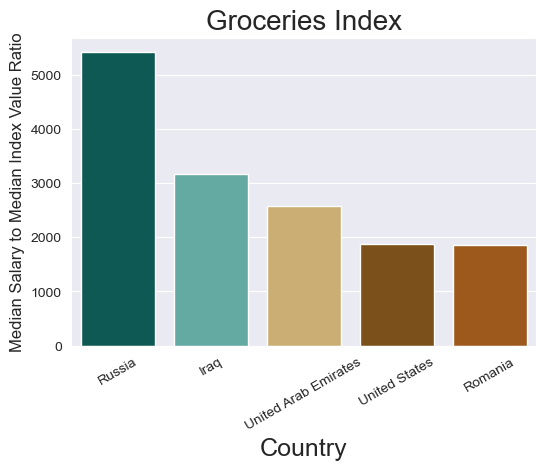

In [48]:
plt.figure(figsize = (6, 4))
sns.barplot(x = 'country',
            y = 'salary_to_index_value_ratio',
            data = top_ratio_groceries_index)
plt.title('Groceries Index', fontsize = 20)
plt.xticks(rotation = 30)
sns.set_style("darkgrid")
plt.xlabel('Country', fontsize = 18)
plt.ylabel('Median Salary to Median Index Value Ratio', fontsize = 12)

In [49]:
top_ratio_restaurant_price_index = median_index_vs_salary[median_index_vs_salary['index_type'] == 'Restaurant Price Index']
top_ratio_restaurant_price_index = top_ratio_restaurant_price_index.nlargest(5, 'salary_to_index_value_ratio')
print(top_ratio_restaurant_price_index)

                  country              index_type  median_index_value  \
221                Russia  Restaurant Price Index               33.25   
113                  Iraq  Restaurant Price Index               29.43   
41                  China  Restaurant Price Index               33.46   
263  United Arab Emirates  Restaurant Price Index               59.03   
59         Czech Republic  Restaurant Price Index               36.46   

     median_salary  salary_to_index_value_ratio  
221       157500.0                      4736.13  
113       100000.0                      3397.89  
41         71665.5                      2141.83  
263       115000.0                      1948.16  
59         69999.0                      1920.15  


Text(0, 0.5, 'Median Salary to Median Index Value Ratio')

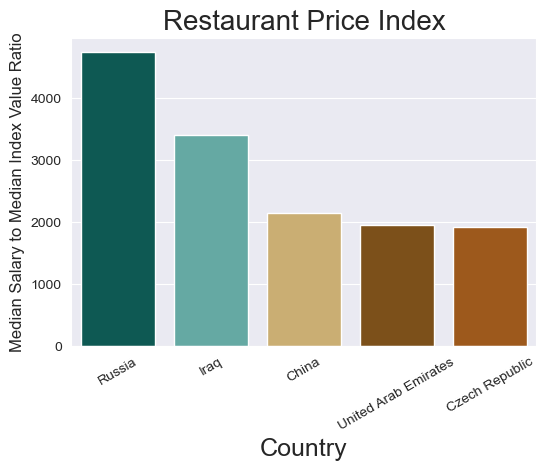

In [50]:
plt.figure(figsize = (6, 4))
sns.barplot(x = 'country',
            y = 'salary_to_index_value_ratio',
            data = top_ratio_restaurant_price_index)
plt.title('Restaurant Price Index', fontsize = 20)
plt.xticks(rotation = 30)
sns.set_style("darkgrid")
plt.xlabel('Country', fontsize = 18)
plt.ylabel('Median Salary to Median Index Value Ratio', fontsize = 12)

In [51]:
top_ratio_local_purchasing_power_index = median_index_vs_salary[median_index_vs_salary['index_type'] == 'Local Purchasing Power Index']
top_ratio_local_purchasing_power_index = top_ratio_local_purchasing_power_index.nlargest(5, 'salary_to_index_value_ratio')
print(top_ratio_local_purchasing_power_index)

                  country                    index_type  median_index_value  \
219                Russia  Local Purchasing Power Index               37.64   
189               Nigeria  Local Purchasing Power Index                8.30   
111                  Iraq  Local Purchasing Power Index               39.46   
261  United Arab Emirates  Local Purchasing Power Index               65.96   
123                Israel  Local Purchasing Power Index               77.61   

     median_salary  salary_to_index_value_ratio  
219       157500.0                      4183.82  
189        30000.0                      3614.46  
111       100000.0                      2534.53  
261       115000.0                      1743.35  
123       119059.0                      1534.07  


Text(0, 0.5, 'Median Salary to Median Index Value Ratio')

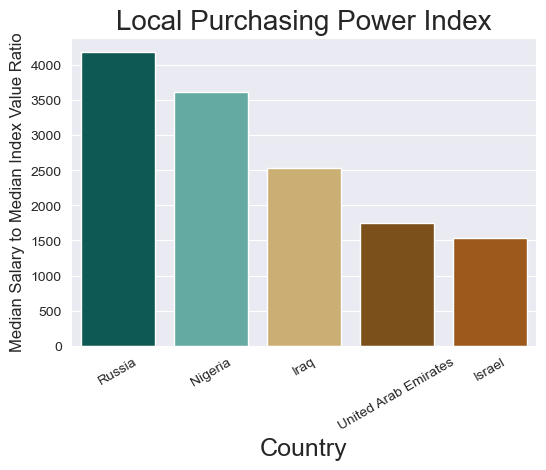

In [52]:
plt.figure(figsize = (6, 4))
sns.barplot(x = 'country',
            y = 'salary_to_index_value_ratio',
            data = top_ratio_local_purchasing_power_index)
plt.title('Local Purchasing Power Index', fontsize = 20)
plt.xticks(rotation = 30)
sns.set_style("darkgrid")
plt.xlabel('Country', fontsize = 18)
plt.ylabel('Median Salary to Median Index Value Ratio', fontsize = 12)

Based on salary to index value ratio, best salaries with respect to...
...cost of living index: Russia, Iraq, United Arab Emirates, United States, New Zealand
...rent index: Russia, Iraq, Romania, India, Malaysia
...cost of living plus rent index: Russia, Iraq, Romania, United States, New Zealand
...groceries index: Russia, Iraq, United Arab Emirates, United States, Romania
...restaurant price index: Russia, Iraq, China, United Arab Emirates, Czech Republic
...local purchasing power index: Russia, Nigeria, Iraq, United Arab Emirates, Israel

I would like to subset the median_index_vs_salary dataframe to only look at countries the appear in the best salaries with respect to each of the indices above so I can create a plot the shows all the data in one shot.

In [53]:
top_ratios = median_index_vs_salary.loc[(median_index_vs_salary['country'].isin(['Iraq', 'Romania', 'New Zealand', 'Russia', 'United Arab Emirates', 'United States', 
                                                                               'China', 'Nigeria', 'India', 'Malaysia'])), ['country', 'index_type', 'salary_to_index_value_ratio']]

In [54]:
print(top_ratios)

                  country                      index_type  \
36                  China            Cost of Living Index   
37                  China  Cost of Living Plus Rent Index   
38                  China                 Groceries Index   
39                  China    Local Purchasing Power Index   
40                  China                      Rent Index   
41                  China          Restaurant Price Index   
96                  India            Cost of Living Index   
97                  India  Cost of Living Plus Rent Index   
98                  India                 Groceries Index   
99                  India    Local Purchasing Power Index   
100                 India                      Rent Index   
101                 India          Restaurant Price Index   
108                  Iraq            Cost of Living Index   
109                  Iraq  Cost of Living Plus Rent Index   
110                  Iraq                 Groceries Index   
111                  Ira

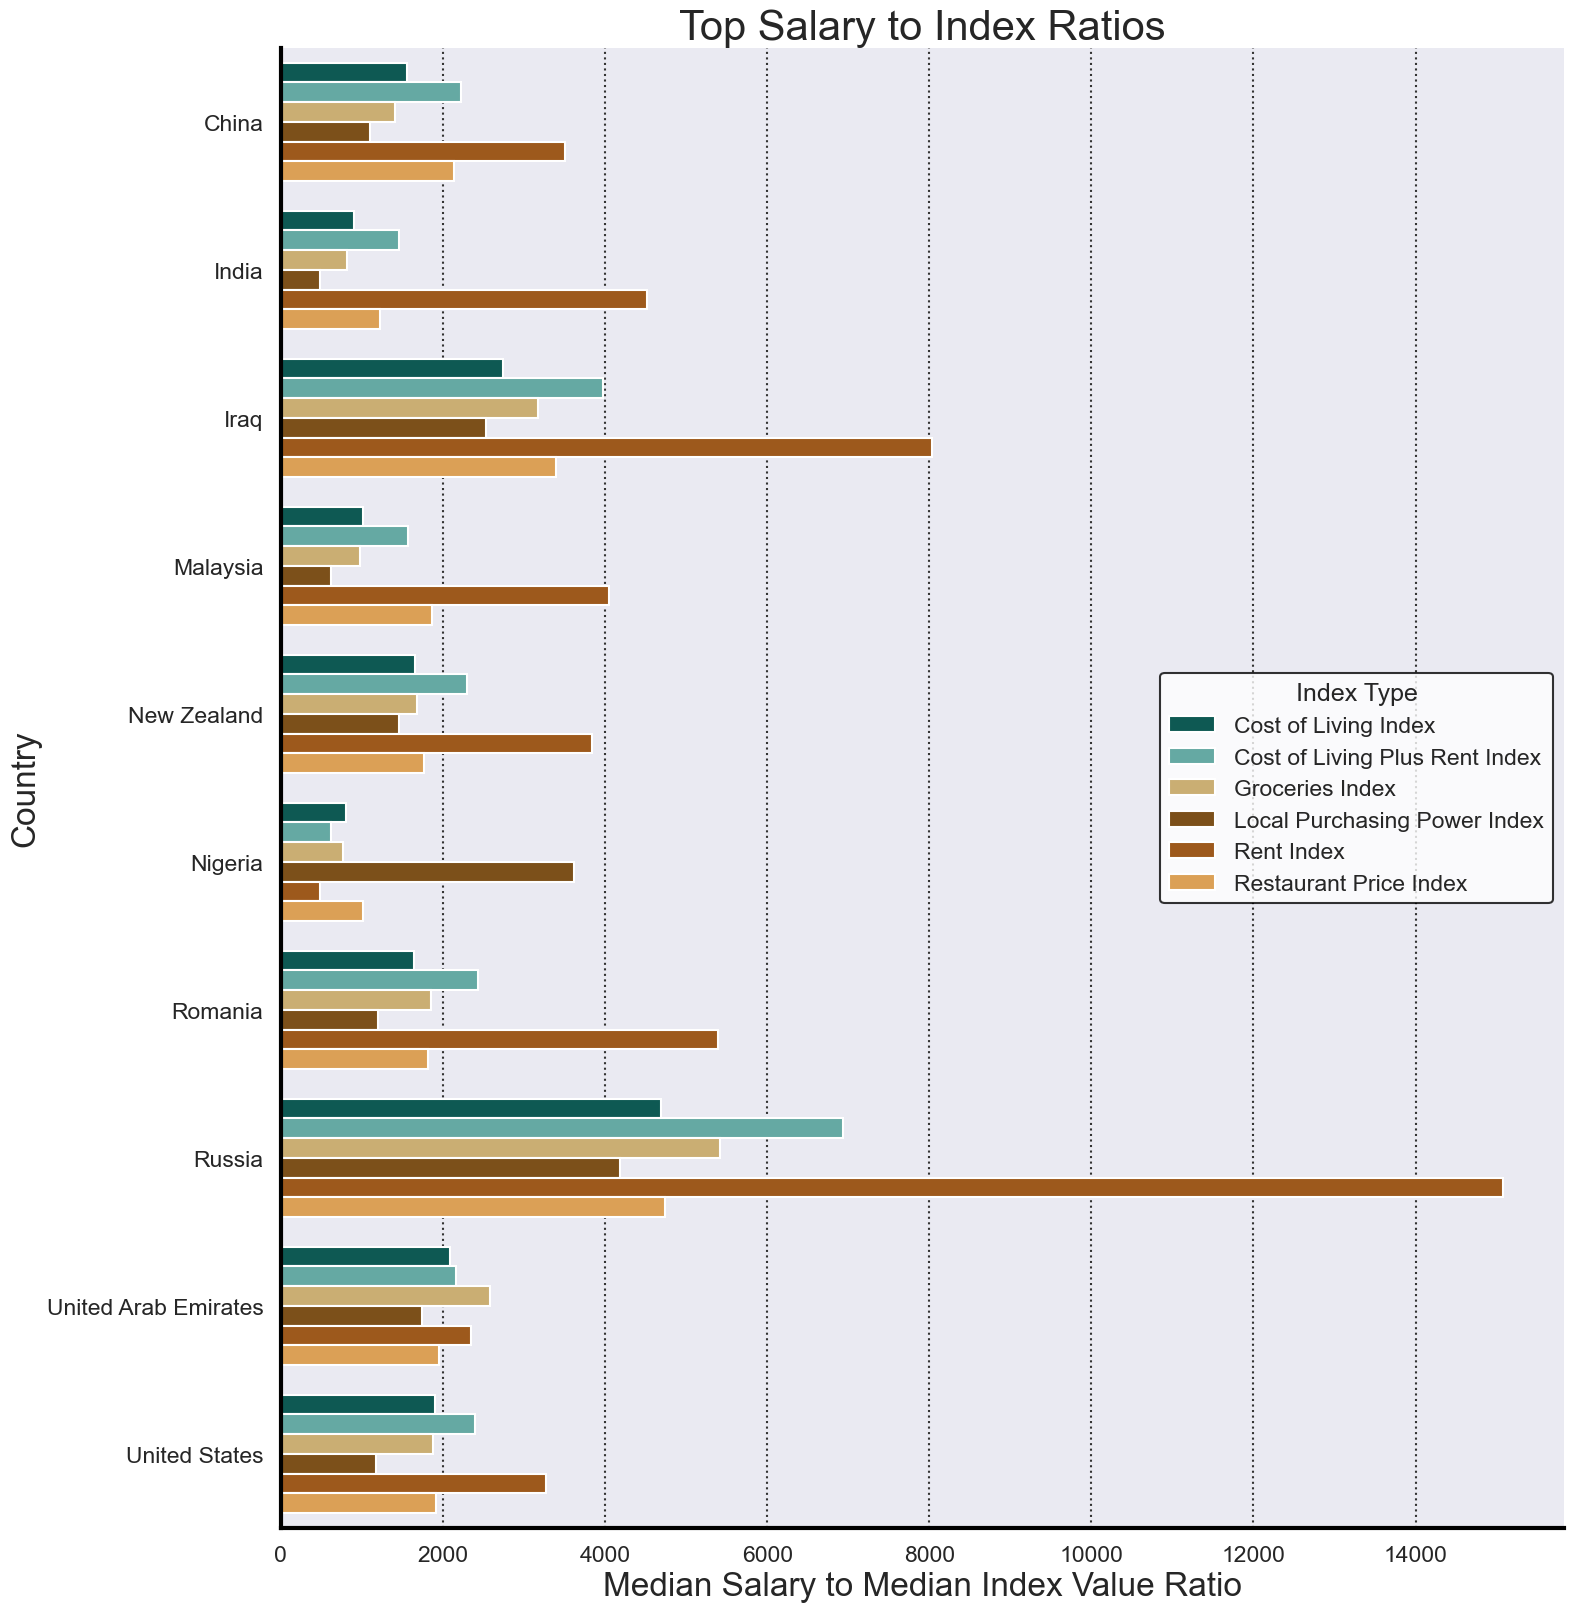

In [55]:
sns.set_context("talk")

# adjust background and grid color/style
sns.set_style("darkgrid", {"grid.color": ".2", "grid.linestyle": ":"})
sns.axes_style("dark")

sns.catplot(data = top_ratios, 
            x = 'salary_to_index_value_ratio', 
            y = 'country', 
            hue = 'index_type', 
            kind = "bar", height = 16, legend = False)
# add title/labels
plt.title('Top Salary to Index Ratios', fontsize = 30)
plt.ylabel('Country', fontsize = 24)
plt.xlabel('Median Salary to Median Index Value Ratio', fontsize = 24)

# change style and color of spines
plt.gca().spines['left'].set_linewidth(3)
plt.gca().spines['left'].set_color('black')
plt.gca().spines['bottom'].set_linewidth(3)
plt.gca().spines['bottom'].set_color('black')

# change legend title
plt.legend(loc = 'center right', title = 'Index Type', facecolor = 'white', edgecolor = 'black')

Based on my analysis, I have concluded that the countries meet the conditions median salary > $100,000 and median cost of living < 100 that also appear on the 'Top Salary to Index Ratios' are the top 5: IRAQ, NEW ZEALAND, RUSSIA, UNITED ARAB EMIRATES, UNITED STATES.  Looking back on the iterations of my questions, I would like to dig a little deeper and look at which cities in each of the top 5 countries would be best to live in.

In [56]:
print(cost_index.head())

       city      country            index_type  index_value
0  Hamilton      Bermuda  Cost of Living Index       149.02
1    Zurich  Switzerland  Cost of Living Index       131.24
2     Basel  Switzerland  Cost of Living Index       130.93
3       Zug  Switzerland  Cost of Living Index       128.13
4    Lugano  Switzerland  Cost of Living Index       123.99


In [68]:
# subset cost_index to include only the top 5 countries
top_5_cost_index = cost_index[cost_index['country'].isin(['Iraq', 'New Zealand', 'Russia', 'United Arab Emirates', 'United States'])]
top_5_cost_index = top_5_cost_index.reset_index(drop = True)
len(top_5_cost_index)
# I wanted to make sure that all 5 indices were there as expected
print(top_5_cost_index[top_5_cost_index['city'] == 'Honolulu, HI'])

             city        country                      index_type  index_value
0    Honolulu, HI  United States            Cost of Living Index       103.65
114  Honolulu, HI  United States                      Rent Index        65.07
228  Honolulu, HI  United States  Cost of Living Plus Rent Index        85.56
342  Honolulu, HI  United States                 Groceries Index       114.92
456  Honolulu, HI  United States          Restaurant Price Index        94.28
570  Honolulu, HI  United States    Local Purchasing Power Index        89.24


In [75]:
# merge with median_index_vs_salary dataframe to include salary and ratio of salary to index value; I expect to have 684 rows to match cost_index after the merge
# first, I want to create a dataframe with country name and median salary
median_index_vs_salary.columns
median_index_vs_salary_city_merge = median_index_vs_salary.drop(['index_type', 'median_index_value', 'salary_to_index_value_ratio'], axis=1)
median_index_vs_salary_city_merge = median_index_vs_salary_city_merge.drop_duplicates()
#print(median_index_vs_salary_city_merge.head())

top_5_index_vs_salary = top_5_cost_index.merge(median_index_vs_salary_city_merge, how = 'inner', on = 'country')
#print(top_5_index_vs_salary.head())
len(top_5_index_vs_salary)

684

In [76]:
# check for null values
top_5_index_vs_salary.isnull().sum()

city             0
country          0
index_type       0
index_value      0
median_salary    0
dtype: int64

In [79]:
# add ratio column to find cities where salary goes the farthest
top_5_index_vs_salary['salary_to_index_value_ratio'] = top_5_index_vs_salary['median_salary']/top_5_index_vs_salary['index_value']

# round values in dataframe to the nearest hundredth
top_5_index_vs_salary = top_5_index_vs_salary.round(2)
print(top_5_index_vs_salary.head())

                city        country            index_type  index_value  \
0       Honolulu, HI  United States  Cost of Living Index       103.65   
1       New York, NY  United States  Cost of Living Index       100.00   
2  Santa Barbara, CA  United States  Cost of Living Index        95.01   
3       Berkeley, CA  United States  Cost of Living Index        94.36   
4  San Francisco, CA  United States  Cost of Living Index        93.91   

   median_salary  salary_to_index_value_ratio  
0       136300.0                      1315.00  
1       136300.0                      1363.00  
2       136300.0                      1434.59  
3       136300.0                      1444.47  
4       136300.0                      1451.39  


In [86]:
# aggregate by index_type to find which cities have the maximum salary to index value ratios for each index_type
top_5_merge = top_5_index_vs_salary.groupby('index_type')['salary_to_index_value_ratio'].max()
top_5_merge = top_5_merge.reset_index()
#print(top_5_merge)

top_cities = top_5_merge.merge(top_5_index_vs_salary, how = 'left', on = 'salary_to_index_value_ratio')
print(top_cities)

                     index_type_x  salary_to_index_value_ratio  \
0            Cost of Living Index                      4906.54   
1  Cost of Living Plus Rent Index                      7453.86   
2                 Groceries Index                      5929.97   
3    Local Purchasing Power Index                      4708.52   
4                      Rent Index                     18124.28   
5          Restaurant Price Index                      5673.63   

             city country                    index_type_y  index_value  \
0  Rostov-na-donu  Russia            Cost of Living Index        32.10   
1  Rostov-na-donu  Russia  Cost of Living Plus Rent Index        21.13   
2  Rostov-na-donu  Russia                 Groceries Index        26.56   
3           Kazan  Russia    Local Purchasing Power Index        33.45   
4  Rostov-na-donu  Russia                      Rent Index         8.69   
5   Yekaterinburg  Russia          Restaurant Price Index        27.76   

   median_salary  

In [87]:
print(top_5_merge)

                       index_type  salary_to_index_value_ratio
0            Cost of Living Index                      4906.54
1  Cost of Living Plus Rent Index                      7453.86
2                 Groceries Index                      5929.97
3    Local Purchasing Power Index                      4708.52
4                      Rent Index                     18124.28
5          Restaurant Price Index                      5673.63


After going through this analysis, I realize it was not useful since the median salary for Russia was so high.

In [59]:
# reexamine levels dataframe
print(levels.head())
levels.dtypes

            timestamp    company level                         title  \
0   6/7/2017 11:33:27     Oracle    L3               Product Manager   
1  6/10/2017 17:11:29       eBay  SE 2             Software Engineer   
2  6/11/2017 14:53:57     Amazon    L7               Product Manager   
3   6/17/2017 0:23:14      Apple    M1  Software Engineering Manager   
4  6/20/2017 10:58:51  Microsoft    60             Software Engineer   

   totalyearlycompensation           location  yearsofexperience  \
0                   127000   Redwood City, CA                1.5   
1                   100000  San Francisco, CA                5.0   
2                   310000        Seattle, WA                8.0   
3                   372000      Sunnyvale, CA                7.0   
4                   157000  Mountain View, CA                5.0   

   yearsatcompany  tag  basesalary  ...  Doctorate_Degree  Highschool  \
0             1.5  NaN    107000.0  ...                 0           0   
1           

timestamp                   object
company                     object
level                       object
title                       object
totalyearlycompensation      int64
location                    object
yearsofexperience          float64
yearsatcompany             float64
tag                         object
basesalary                 float64
stockgrantvalue            float64
bonus                      float64
gender                      object
otherdetails                object
cityid                       int64
dmaid                      float64
rowNumber                    int64
Masters_Degree               int64
Bachelors_Degree             int64
Doctorate_Degree             int64
Highschool                   int64
Some_College                 int64
Race_Asian                   int64
Race_White                   int64
Race_Two_Or_More             int64
Race_Black                   int64
Race_Hispanic                int64
Race                        object
Education           

After looking at the first five rows of the 'levels' dataframe, I wondered if it included cities outside of the US.  I examined the tail and looked at upto 50 rows for both the beginning and end of the dataframe, finding that most of the cities appear to be in the US but there are some cities in other countries.  This led me to wonder what locations were included so I created a list of the unique values in the location column.

In [60]:
levels_location = levels['location'].unique()
len(levels_location)
print(levels_location[0:49])

['Redwood City, CA' 'San Francisco, CA' 'Seattle, WA' 'Sunnyvale, CA'
 'Mountain View, CA' 'Redmond, WA' 'Bellevue, WA' 'Menlo Park, CA'
 'London, EN, United Kingdom' 'Cupertino, CA' 'New York, NY'
 'Los Gatos, CA' 'Dublin, DN, Ireland' 'Baltimore, MD' 'Sacramento, CA'
 'Hillsboro, OR' 'Cambridge, EN, United Kingdom' 'Aliso Viejo, CA'
 'San Jose, CA' 'Bangalore, KA, India' 'Minsk, HM, Belarus'
 'Palo Alto, CA' 'Kirkland, WA' 'Washington, DC' 'Vancouver, BC, Canada'
 'Austin, TX' 'Boston, MA' 'San Diego, CA' 'New Orleans, LA'
 'Santa Clara, CA' 'Irvine, CA' 'Pittsburgh, PA' 'San Ramon, CA'
 'Los Angeles, CA' 'Folsom, CA' 'Charleston, SC' 'Moscow, MC, Russia'
 'Culver City, CA' 'Mc Lean, VA' 'Portland, OR' 'Boulder, CO'
 'Pleasanton, CA' 'Fremont, CA' 'Beaverton, OR' 'Omaha, NE' 'Waltham, MA'
 'Philadelphia, PA' 'Indianapolis, IN' 'Milwaukee, WI']


Again, looking at the list returned, the majority of cities included in this dataframe appear to be in the US.  I wonder what currency the 'totalyearlycompensation' and 'basesalary' are in...

In [61]:
UK_levels = levels[levels['location'] == 'London, EN, United Kingdom']
print(UK_levels['totalyearlycompensation'])

18         50000
124       220000
237        80000
316       230000
320       305000
          ...   
61708      93000
61821     110000
62133     160000
62179    1600000
62265      72000
Name: totalyearlycompensation, Length: 1024, dtype: int64


There are 1,024 entries from London.  The salary values seem like they could reasonably be in USD.  I will look at the minimum and maximum values for totalyearlycompensation from the levels dataframe to see if it seems as though the column could be reported in USD.

In [62]:
max_totalyearlycompensation = levels['totalyearlycompensation'].max()
print(max_totalyearlycompensation)

levels.loc[levels['totalyearlycompensation'] == max_totalyearlycompensation]

4980000


,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
61991,7/30/2021 22:23:24,Facebook,E9,Product Manager,4980000,"Menlo Park, CA",17.0,0.0,Product,380000.0,...,0,0,0,1,0,0,0,0,Asian,Master's Degree


In [63]:
min_totalyearlycompensation = levels['totalyearlycompensation'].min()
print(min_totalyearlycompensation)

levels.loc[levels['totalyearlycompensation'] == min_totalyearlycompensation].head()

10000


,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
5467,4/3/2019 0:20:16,Bukalapak,Designer I,Product Designer,10000,"Jakarta, JK, Indonesia",4.0,1.0,Design Experience,10000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
11003,9/16/2019 23:19:35,Microsoft,SDE I,Software Engineer,10000,"Chennai, TN, India",0.0,1.0,Web Development (Front-End),1000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
12078,10/16/2019 4:51:23,Andela,D2,Software Engineer,10000,"Lagos, LA, Nigeria",2.0,2.0,API Development (Back-End),10000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
12079,10/16/2019 4:55:32,Andela,E3,Software Engineer,10000,"Lagos, LA, Nigeria",2.0,2.0,Full Stack,10000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
12080,10/16/2019 5:07:55,Andela,Junior developer,Software Engineer,10000,"Lagos, LA, Nigeria",2.0,1.0,Web Development (Front-End),8000.0,...,0,0,0,0,0,0,0,0,NaN,NaN


After examining the data, I still believe that the reported totalyearlycompensation could be in USD.
Because of this ambiguity and since I ended up digging so deep into the other dataframes, I decided to forgo digging deeper into this dataframe for the project.

REFLECTION: There was a lot I wanted to do with this data, but had trouble aligning the information.  If I was doing this project for a real presentation, I would probably gather the information on salaries from  locations and then find the cost of living indices for those locations I had salaries for to ensure that the relationship made sense.  I feel like this could also eliminate null values.  Alternatively, as I was using this data, I was thinking it could be better to merge based on the cities.  Again, if this was an actual project I was doing for a job, I would probably perform more research or work with my team to fill the null values or brainstrom an alternative approach. Using averages seemed imprecise at times and really was just giving a best educated guess. 

MY DATA STORY: My presentation begins with having the audience look at a visualization representing the relationship between median salary and median index value for each of the index types.  The values on the bottom right part of the graph are those of interest to answer the question as they represent the countries with high median salaries and lower median index values.  The next slide shows a table that identifies those countries.  Finally, the presentation cross references these results with the ratio between median salary and median index value, confirming that these countries are among the top 5 places in the world where your salary will go the farthest with respect o each of the indices in the file provided.